In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scienceplots # pip install scienceplots
plt.style.use(["science", "notebook", "grid"])
plt.rcParams["text.usetex"] = True

## Rotating diatomic molecule partition function.

A rotating diatomic molecule has a set of degenerate rotational energy levels,
$$\epsilon_{j}=\frac{\hbar^{2}}{2I}j(j+1),\space j=0,1,2,...,$$
where $I$ is the moment of intertia,
$$I=\mu d^{2}$$
The degeneracy of these levels is mathematically expressed as,
$$g_{j}=2j+1$$
Considering the definition of the partition function for one molecule,
$$Z_{1}^{r}=\Sigma_{j}g_{j}e^{-\beta \epsilon_{j}}$$
by defining the characteristic rotational temperature,
$$\theta_{r}=\frac{\hbar^{2}}{2Ik_{B}},$$
the partition function $Z_{1}^{r}$ takes the form,
$$Z_{1}^{r}(T)=\Sigma_{j=0}^{\infty}(2j+1)e^{-\frac{\theta_{r}}{T}j(j+1)}$$

## Average rotational energy and heat capacity.

The average energy of a molecule can be expressed in the form,
$$<\epsilon_{1}>=-\frac{\partial lnZ_{1}^{r}}{\partial\beta}=-\frac{1}{Z_{1}^{r}}\frac{\partial Z_{1}^{r}}{\partial\beta},$$
while the total energy due to rotation will be equal to,
$$E_{r}=N<\epsilon_{1}>$$
Finally, the total heat capacity due to rotation will be expressed as,
$$C_{V}^{r}=\left(\frac{\partial E_{r}}{\partial T}\right)_{V}=\frac{1}{k_{B}T^{2}}\left(-\frac{\left(Z_{1}^{r}{'}\right)^{2}-Z_{1}^{r} \left(Z_{1}^{r}{''}\right)}{\left(Z_{1}^{r}\right)^{2}} \right),$$
where,
$$Z_{1}^{r}{'}=\frac{\partial Z_{1}^{r}}{\partial\beta}=(-k_{B}T)\Sigma_{j=0}^{\infty}j(j+1)(2j+1)e^{-\frac{\theta_{r}}{T}j(j+1)}$$
and
$$Z_{1}^{r}{''}=\frac{\partial^{2}Z_{1}^{r}}{\partial\beta^{2}}=(k_{B}T)^{2}\Sigma_{j=0}^{\infty}j^{2}(j+1)^{2}(2j+1)e^{-\frac{\theta_{r}}{T}j(j+1)}$$

The dimensionless quantities,
$${\tilde{Z_{1}^{r}}}{'}\equiv\frac{Z_{1}^{r}{'}}{-k_{B}T}=\Sigma_{j=0}^{\infty}j(j+1)(2j+1)e^{-\frac{\theta_{r}}{T}j(j+1)}$$
and
$${\tilde{Z_{1}^{r}}}{''}\equiv\frac{Z_{1}^{r}{''}}{(k_{B}T)^{2}}=\Sigma_{j=0}^{\infty}j^{2}(j+1)^{2}(2j+1)e^{-\frac{\theta_{r}}{T}j(j+1)}$$
can be defined so as to get the final dimensionless rotational heat capacity,
$$\frac{C_{V}^{r}}{R}=\left(\frac{\theta_{\pi}}{T}\right)^{2}\left(-\frac{\left({\tilde{Z_{1}^{r}}}{'}\right)^{2}-Z_{1}^{r}{\tilde{Z_{1}^{r}}}{''}}{\left(Z_{1}^{r}\right)^{2}}\right)$$

In [2]:
# Defining all the functions needed to get to Cv.

def r(T, t): return t / T # T is the temperature of the gas, while t is the characteristic rotational temperature.

def Z1j(T, t, j):
    
    return ((2*j + 1) * np.exp(-r(T, t) * j * (j + 1)))

def dZ1j(T, t, j):
    
    return (j * (j + 1) * (2*j + 1) * np.exp(-r(T, t) * j * (j + 1)))

def d2Z1j(T, t, j):
    
    return ((j**2) * ((j+1)**2) * (2*j + 1) * np.exp(-r(T, t) * j * (j+1)))

def Cv(T, t, j_max):
    
    Z1 = 0 ; dZ1 = 0 ; d2Z1 = 0
    
    for j in range(j_max):
        Z1 += Z1j(T, t, j)
        dZ1 += dZ1j(T, t, j)
        d2Z1 += d2Z1j(T, t, j)
    
    return -(r(T, t)**2) * ((dZ1**2) - d2Z1 * Z1) / (Z1**2)

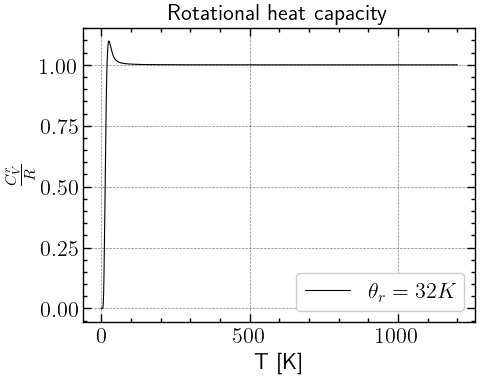

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

T = np.linspace(0.001, 1200, 2000)

ax.plot(T, Cv(T, 32, 1000), color = "black", label = r"$\theta_{r}=32K$")
ax.set_xlabel("T [K]") ; ax.set_ylabel(r"$\frac{C_{V}^{r}}{R}$") ; ax.set_title("Rotational heat capacity")
ax.legend(loc = "lower right") ; plt.rcParams["lines.linewidth"] = 0.8
plt.savefig("Rotational heat capacity.pdf", dpi=150)
plt.show()

In [5]:
Cv(20, 32, 1000) # Value at 20K.

1.0197144165717626

In [6]:
Cv(1000, 32, 1000) # Value at 1000K.

1.000023323793392